# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [16]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [17]:
def prepare_data(data):
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    data.columns = map(lambda x: x.replace('.', '_'), data.columns)
    
prepare_data(data_train)
prepare_data(data_test)
prepare_data(data_full)

In [18]:
display(data_train.head())
data_train.info()

,date,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_concentrate_au,final_output_recovery,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol,final_output_tail_au,...,secondary_cleaner_state_floatbank4_a_air,secondary_cleaner_state_floatbank4_a_level,secondary_cleaner_state_floatbank4_b_air,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final_output_concentrate_ag                           16788 non-null float64
final_output_concentrate_pb                           16788 non-null float64
final_output_concentrate_sol                          16490 non-null float64
final_output_concentrate_au                           16789 non-null float64
final_output_recovery                                 15339 non-null float64
final_output_tail_ag                                  16794 non-null float64
final_output_tail_pb                                  16677 non-null float64
final_output_tail_sol                                 16715 non-null float64
final_output_tail_au                                  16794 non-null float64
primary_cleaner_input_sulfate                         15553 non-null float64
primary_cleaner_input_depressant     

In [19]:
display(data_test.head())
data_test.info()

,date,primary_cleaner_input_sulfate,primary_cleaner_input_depressant,primary_cleaner_input_feed_size,primary_cleaner_input_xanthate,primary_cleaner_state_floatbank8_a_air,primary_cleaner_state_floatbank8_a_level,primary_cleaner_state_floatbank8_b_air,primary_cleaner_state_floatbank8_b_level,primary_cleaner_state_floatbank8_c_air,...,secondary_cleaner_state_floatbank4_a_air,secondary_cleaner_state_floatbank4_a_level,secondary_cleaner_state_floatbank4_b_air,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner_input_sulfate                 5554 non-null float64
primary_cleaner_input_depressant              5572 non-null float64
primary_cleaner_input_feed_size               5856 non-null float64
primary_cleaner_input_xanthate                5690 non-null float64
primary_cleaner_state_floatbank8_a_air        5840 non-null float64
primary_cleaner_state_floatbank8_a_level      5840 non-null float64
primary_cleaner_state_floatbank8_b_air        5840 non-null float64
primary_cleaner_state_floatbank8_b_level      5840 non-null float64
primary_cleaner_state_floatbank8_c_air        5840 non-null float64
primary_cleaner_state_floatbank8_c_level      5840 non-null float64
primary_cleaner_state_floatbank8_d_air        5840 non-null float64
primary_cleaner_state_floatbank8_d_level      5840 non-null float64
ro

In [20]:
display(data_full.head())
data_full.info()

,date,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_concentrate_au,final_output_recovery,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol,final_output_tail_au,...,secondary_cleaner_state_floatbank4_a_air,secondary_cleaner_state_floatbank4_a_level,secondary_cleaner_state_floatbank4_b_air,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final_output_concentrate_ag                           22627 non-null float64
final_output_concentrate_pb                           22629 non-null float64
final_output_concentrate_sol                          22331 non-null float64
final_output_concentrate_au                           22630 non-null float64
final_output_recovery                                 20753 non-null float64
final_output_tail_ag                                  22633 non-null float64
final_output_tail_pb                                  22516 non-null float64
final_output_tail_sol                                 22445 non-null float64
final_output_tail_au                                  22635 non-null float64
primary_cleaner_input_sulfate                         21107 non-null float64
primary_cleaner_input_depressant     

Проверю, что эффективность обогащения рассчитана правильно. Напишу функцию для рассчеиа эффективности, где c - доля золота в концентрате после флотации/очистки, f - доля золота в сырье/концентрате до флотации/очистки, t - доля золота в отвальных хвостах после флотации/очистки. Вычислю ее на обучающей выборке для признака rougher.output.recovery.

In [21]:
def recovery_count(c, f, t):
    return((c * (f - t)) / (f * (c - t))) * 100
count_rougher_output_recovery = data_train.dropna().apply(lambda x: 
                                              recovery_count(x['rougher_output_concentrate_au'], 
                                                             x['rougher_input_feed_au'],
                                                             x['rougher_output_tail_au']), axis =  1)
print(mean_absolute_error(data_train.dropna()['rougher_output_recovery'], count_rougher_output_recovery))

9.555596961987514e-15


Ошибка очень маленькая, а значит эффективность обогащения рассчитана правильно.

Проанализирую признаки, недоступные в тестовой выборке.

In [22]:
diff_columns = list(set(data_train.columns.to_list()) - set(data_test.columns.to_list()))
print(pd.Series(diff_columns).sort_values().reset_index(drop = True))

0                           final_output_concentrate_ag
1                           final_output_concentrate_au
2                           final_output_concentrate_pb
3                          final_output_concentrate_sol
4                                 final_output_recovery
5                                  final_output_tail_ag
6                                  final_output_tail_au
7                                  final_output_tail_pb
8                                 final_output_tail_sol
9                 primary_cleaner_output_concentrate_ag
10                primary_cleaner_output_concentrate_au
11                primary_cleaner_output_concentrate_pb
12               primary_cleaner_output_concentrate_sol
13                       primary_cleaner_output_tail_ag
14                       primary_cleaner_output_tail_au
15                       primary_cleaner_output_tail_pb
16                      primary_cleaner_output_tail_sol
17                      rougher_calculation_au_p

В первом приближении мы видим, что в выборке test нет колонок с типами параметра: output и calculation. Чтобы окончательно в этом убедиться проведем дополнительную проверку.

In [23]:
for column in list(data_test.columns):
    if (column.rfind('.output.') >= 0) or (column.rfind('.calculation.') >= 0):
        print(column)
print('Проверка завершена!')

Проверка завершена!


Кроме фразы "Проверка завершена!" ничего не получили. Значит, действительно, в test выборке исключили все колонки с output и calculation.

In [24]:
train = data_train
test = data_test

In [25]:
TARGET_INDICATORS = ['final_output_recovery', 'rougher_output_recovery']

In [26]:
# Удалю строки с пустыми целевыми показателями
train = train.dropna(subset = TARGET_INDICATORS)

# Заполню пропущенные значения по ближайшим значениям используя ffill
train = train.fillna(method = 'ffill')

# В test добавляем целевые показатели из таблицы full
test = test.merge(data_full, on = 'date', how = 'left', suffixes = ('', '_full'))

# Аналогично заполню пропуски, удалю строки с пустыми ЦП
test = test.dropna(subset = TARGET_INDICATORS)
test = test.fillna(method = 'ffill')

# 2. Анализ данных

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Сведу полученные данные в новую таблицу. Динамику изменения концентрации металлов будем отслеживать по слудеющим показателем: rougher_input_feed - исходная концентрация металла, rougher_output_concentrate - концентрация металла после флотации, rimary_cleaner_output_concentrate - после первичной очистки, final_output_concentrate - после финальной очистки.

In [27]:
metall = ['au', 'ag', 'pb']
step = ['input', 'rougher', 'primary_cleaner', 'final']

metall_conc = pd.DataFrame(columns = step)

for i in metall:
    for j in step:
        if (j == 'input'):
            metall_conc.loc[i, j] = data_full['rougher_input_feed_' + i].mean()
        else:
            metall_conc.loc[i, j] = data_full[j + '_output_concentrate_' + i].mean()
            
step_percent_to_input = []
for column in step:
    new_column = column + '_percent_to_input'
    metall_conc[new_column] = 100 * metall_conc[column] / metall_conc['input']
    step_percent_to_input.append(new_column)
    
metall_conc

,input,rougher,primary_cleaner,final,input_percent_to_input,rougher_percent_to_input,primary_cleaner_percent_to_input,final_percent_to_input
au,7.56584,17.8795,29.2123,40.0012,100,236.319,386.108,528.708
ag,8.06572,10.8745,7.69165,4.78156,100,134.824,95.3623,59.2825
pb,3.30568,6.90065,8.92111,9.09531,100,208.751,269.872,275.142


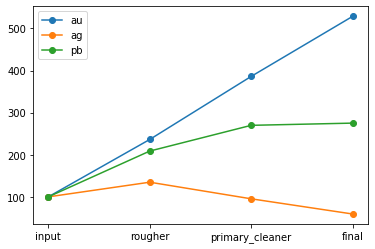

In [28]:
for i in metall:
    plt.plot(
    step,
    metall_conc.loc[i][step_percent_to_input],
    linestyle = '-',
    marker = 'o',
    label = i)
plt.legend(loc = 'upper left')
plt.show()

Концентрация золота растет практически линейно от этапа к этапу, концентрация свинца растет от этапа к этапу, но практически не меняется при сравнении результатов первичной и финальной очистки, концентрация серебра подает к концу технологического процесса.

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Для анализа построю гистограммы распределения признака rougher.input.feed_size на train и test.

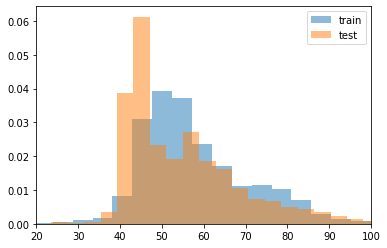

In [29]:
plt.hist(train['rougher_input_feed_size'], bins = 100, alpha = 0.5, 
         label = 'train', density = True)
plt.hist(test['rougher_input_feed_size'], bins = 100, alpha = 0.5, 
         label = 'test', density = True)
plt.legend(loc = 'upper right')
plt.xlim(20 , 100)
plt.show()

Видно, что распределения различаются.

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [30]:
#Для анализа суммарной концетрации выделю следующие группы колонок
conc_column = [
    'rougher_input_feed',
    'rougher_output_concentrate',
    'primary_cleaner_output_concentrate',
    'final_output_concentrate'
]

#Добавлю новые колонки по списку, по всем металлам и значениям из колонки sol
for column in conc_column:
    train[column] = 0
    for i in metall:
        train[column] += train[column + '_' + i]
    train[column] += train[column + '_sol']
    
train.loc[:, ['date'] + conc_column].head()

,date,rougher_input_feed,rougher_output_concentrate,primary_cleaner_output_concentrate,final_output_concentrate
0,2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667


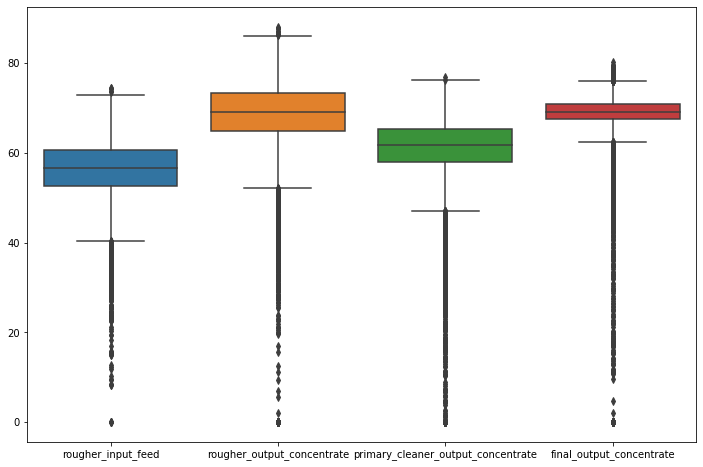

In [31]:
#Построю ящик с усами для полученных признаков
plt.figure(figsize = (12, 8))
sns.boxplot(data = train[conc_column])
plt.show()

У всех 4-х групп есть выбросы, удалю выбросы из таблиц train.

In [32]:
for column in conc_column:
    q25 = train[column].quantile(q = 0.25)
    q75 = train[column].quantile(q = 0.75)
    lower_border = q25 - 1.5 * (q75 - q25)
    high_border = q75 + 1.5 * (q75 - q25)
    train = train.query(column + ' >= @lower_border and ' + column + ' <= @high_border')
    
train.shape

(11855, 91)

In [33]:
# После удаления аномалий удалю колоноки, которые добавил
train = train.drop(conc_column, axis = 'columns')

# 3. Модель

### 3.1. Напишите функцию для вычисления итоговой sMAPE. 

Поскольку состав колонок в таблицах train и test отличается приведу его к общему знаменателю. Для этого удалю лишние признаки из train (кроме целевых показателей). Также удалю колонку date: для работы модели она не нужна.

In [20]:
columns_to_drop = diff_columns + ['date']
try:
    for ind in TARGET_INDICATORS:
        columns_to_drop.remove(ind)
    train = train.drop(columns_to_drop, axis='columns')
except: ()
    
# В test оставляем те же столбцы, что и в train
test = test.loc[:, list(train.columns)]

In [21]:
def decompose_y(y_true, y_pred):
    y_true_final = y_true['final_output_recovery']
    y_true_rougher = y_true['rougher_output_recovery']
    
    y_pred_final = []
    y_pred_rougher = []
    for i in range(0, len(y_pred)):
        y_pred_final.append(y_pred[i][0])
        y_pred_rougher.append(y_pred[i][1])
        
    return y_true_final, y_pred_final, y_true_rougher, y_pred_rougher

def get_smape(y_true, y_pred):
    y_true = y_true.reset_index(drop=True)
    y_pred = pd.Series(y_pred).reset_index(drop=True)
    return 100 * (2 * (y_true - y_pred).abs() / (y_true.abs() + y_pred.abs())).sum() / len(y_true)

def get_final_smape(y_true, y_pred):
    y_true_final, y_pred_final, y_true_rougher, y_pred_rougher = decompose_y(y_true, y_pred)
    return 0.25 * get_smape(y_true_rougher, y_pred_rougher) + 0.75 * get_smape(y_true_final, y_pred_final)

#score для дальнейшего использования при кросс-валидации
final_smape_score = make_scorer(get_final_smape, greater_is_better = False)

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.  

In [22]:
x_train = train.drop(TARGET_INDICATORS, axis='columns')
y_train = train[TARGET_INDICATORS]
x_test = test.drop(TARGET_INDICATORS, axis='columns')
y_test = test[TARGET_INDICATORS]

In [23]:
# Выполним масштабирование данных
numeric = x_train.columns.to_list()

scaler = StandardScaler()
scaler.fit(x_train[numeric])
x_train[numeric] = scaler.transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

In [24]:
#LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_smape = cross_val_score(lr_model, x_train, y_train, cv=5, scoring=final_smape_score).mean()
print('final_smape для LinearRegression:', -lr_smape)

final_smape для LinearRegression: 8.971486213193348


In [25]:
#RandomForestRegressor
param_grid = {
    'n_estimators': range(10, 21, 10),
    'max_depth': range(10, 16)
}

model = RandomForestRegressor(random_state=12345)
gs = GridSearchCV(model, param_grid, scoring=final_smape_score, cv=5)
gs.fit(x_train, y_train)
print('final_smape для RandomForestRegressor:', -gs.best_score_)

final_smape для RandomForestRegressor: 9.194109498640332


Лучший результат дала модель линейной регрессии.

In [26]:
best_model = lr_model
y_pred = best_model.predict(x_test)
print('final_smape для тестовых данных:', get_final_smape(y_test, y_pred))

final_smape для тестовых данных: 9.296904580464982


Проведу сравнение качества итоговой модели с качеством константной модели.

In [27]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(x_train, y_train)
y_pred = dummy_model.predict(x_test)
print('final_smape foget_final_smapemy_model with mean strategy:', get_final_smape(y_test, y_pred))

dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(x_train, y_train)
y_pred = dummy_model.predict(x_test)
print('final_smape for dummy_model with median strategy:', get_final_smape(y_test, y_pred))

final_smape foget_final_smapemy_model with mean strategy: 9.557436428648664
final_smape for dummy_model with median strategy: 9.346049686218171


Полученная ранее модель (линейная регрессия) дала лучшую метрику по сравнению с константной моделью (9.2969 против 9.3460 у медианной модели).

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке